<a href="https://colab.research.google.com/github/Thibisay/Proyecto-SIC-cubitUCV/blob/Thibisay/IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#@title Importaciones
import kagglehub, pandas as pd, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
anime_with_emotions = pd.read_csv('https://raw.githubusercontent.com/Thibisay/Proyecto-SIC-cubitUCV/Andreina/Analisis%20de%20datos/anime_with_emotions.csv')
anime_with_emotions_and_name = pd.read_csv('https://raw.githubusercontent.com/Thibisay/Proyecto-SIC-cubitUCV//Diego/anime_with_emotion_and_name.csv')
anime_with_emotions_and_name


,anime_id,fear,sadness,neutral,joy,anger,surprise,disgust,title,popularity_rank
0,16498,0.930178,0.002300,0.006931,0.000917,0.027780,0.002147,0.029748,Shingeki no Kyojin,1
1,1535,0.085855,0.015855,0.034499,0.002459,0.053454,0.001762,0.806115,Death Note,2
2,5114,0.752298,0.029428,0.014101,0.001377,0.105504,0.003924,0.093368,Fullmetal Alchemist: Brotherhood,3
3,30276,0.014385,0.011197,0.043884,0.004364,0.010014,0.911681,0.004475,One Punch Man,4
4,11757,0.104916,0.042347,0.239856,0.006279,0.087860,0.008804,0.509938,Sword Art Online,5
...,...,...,...,...,...,...,...,...,...,...
7579,39331,0.003019,0.002221,0.928283,0.031547,0.010396,0.018052,0.006482,Zounds,15837
7580,40474,0.005328,0.004118,0.861680,0.033735,0.004688,0.016691,0.073760,Googuri Googuri,16029
7581,40361,0.000982,0.008691,0.822527,0.086056,0.003946,0.073903,0.003895,"Shiro no Kanga""roo"" no Uta",16179
7582,39704,0.941348,0.002037,0.003745,0.005805,0.018552,0.007465,0.021048,Shiroi Unabara,16308


In [37]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(anime_with_emotions.iloc[:, 1:])




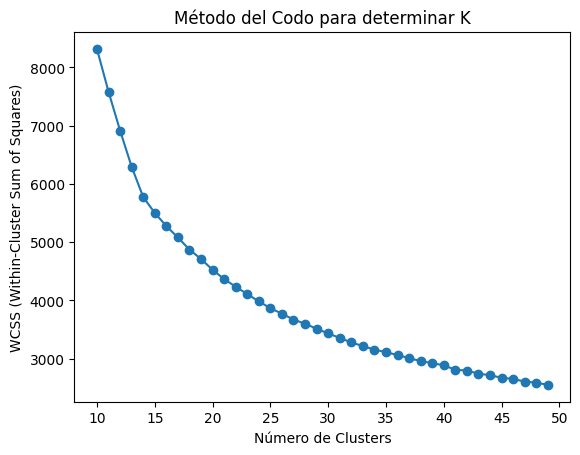

In [38]:
wcss = []
for k in range(10, 50):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(10, 50), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método del Codo para determinar K")
plt.show()

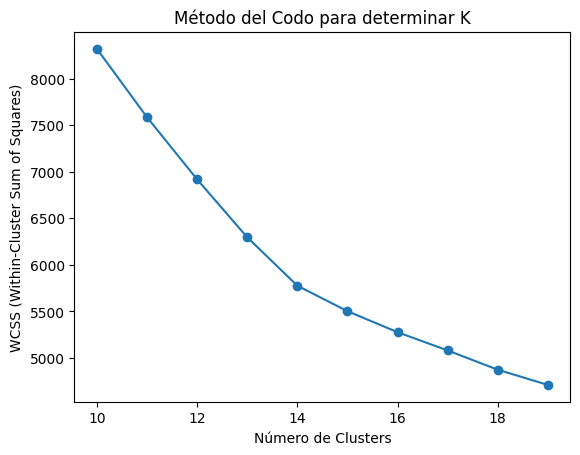

In [39]:
wcss = []
for k in range(10, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(10, 20), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método del Codo para determinar K")
plt.show()

Se encontró entonces que el mínimo de codo óptimo es de 14 con lo cual pasaremos a trabajar con 14 clusters.

In [40]:
kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)

In [41]:

anime_with_emotions_and_name["Cluster"] = kmeans.fit_predict(X_scaled)

print(anime_with_emotions_and_name[["anime_id", "Cluster"]])
# Visualizión clusters (Usamos PCA para reducir dimensiones a 2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
anime_with_emotions_and_name

      anime_id  Cluster
0        16498        1
1         1535        6
2         5114        1
3        30276        5
4        11757       11
...        ...      ...
7579     39331        0
7580     40474        0
7581     40361        0
7582     39704        1
7583     50110        5

[7584 rows x 2 columns]


,anime_id,fear,sadness,neutral,joy,anger,surprise,disgust,title,popularity_rank,Cluster
0,16498,0.930178,0.002300,0.006931,0.000917,0.027780,0.002147,0.029748,Shingeki no Kyojin,1,1
1,1535,0.085855,0.015855,0.034499,0.002459,0.053454,0.001762,0.806115,Death Note,2,6
2,5114,0.752298,0.029428,0.014101,0.001377,0.105504,0.003924,0.093368,Fullmetal Alchemist: Brotherhood,3,1
3,30276,0.014385,0.011197,0.043884,0.004364,0.010014,0.911681,0.004475,One Punch Man,4,5
4,11757,0.104916,0.042347,0.239856,0.006279,0.087860,0.008804,0.509938,Sword Art Online,5,11
...,...,...,...,...,...,...,...,...,...,...,...
7579,39331,0.003019,0.002221,0.928283,0.031547,0.010396,0.018052,0.006482,Zounds,15837,0
7580,40474,0.005328,0.004118,0.861680,0.033735,0.004688,0.016691,0.073760,Googuri Googuri,16029,0
7581,40361,0.000982,0.008691,0.822527,0.086056,0.003946,0.073903,0.003895,"Shiro no Kanga""roo"" no Uta",16179,0
7582,39704,0.941348,0.002037,0.003745,0.005805,0.018552,0.007465,0.021048,Shiroi Unabara,16308,1


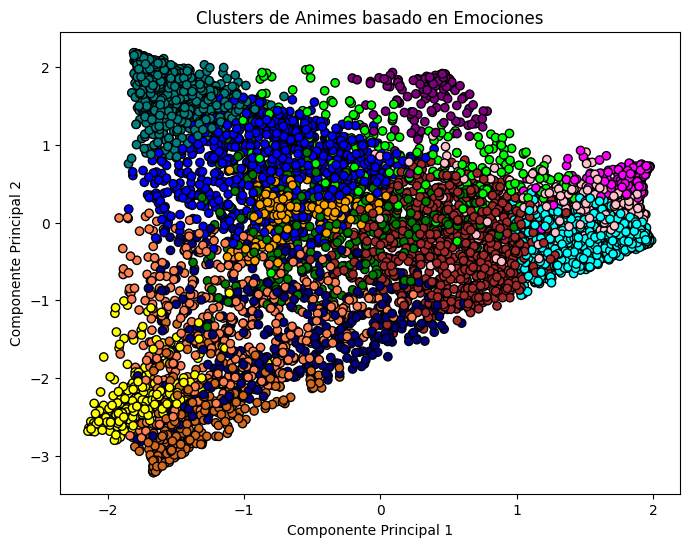

In [42]:
# Graficación de los cluster
colores_personalizados = ["Aqua", "teal", "green", "yellow", "orange", "purple", "Chocolate", "magenta", "brown", "pink", "lime", "navy", "Blue", "Coral"]
clusters = anime_with_emotions_and_name["Cluster"]

# Usamos nuestros colores personalizados
colores = [colores_personalizados[cluster] for cluster in clusters]
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colores, edgecolors="k")
plt.title("Clusters de Animes basado en Emociones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [43]:
X_scaled = np.array([[0.5502753257751465,0.009358766488730907,0.22698335349559784,0.0048016393557190895,0.03420035541057587,0.08410433679819107,0.09027614444494247]])

result = kmeans.predict(X_scaled)

print(result)

#anime_with_emotions[anime_with_emotions['Cluster'] == result[0]].to_csv("un_nombre.csv",index = False)

anime_with_emotions_and_name[anime_with_emotions_and_name['Cluster'] == result[0]]

[12]


,anime_id,fear,sadness,neutral,joy,anger,surprise,disgust,title,popularity_rank,Cluster
9,11061,0.491358,0.024139,0.238488,0.058729,0.125358,0.002375,0.059552,Hunter x Hunter (2011),10,12
29,31043,0.503309,0.282176,0.024625,0.002433,0.134693,0.003522,0.049243,Boku dake ga Inai Machi,30,12
32,21881,0.375610,0.031738,0.212783,0.003088,0.217421,0.004064,0.155296,Sword Art Online II,33,12
34,24833,0.339724,0.004541,0.366934,0.017528,0.050904,0.046322,0.174046,Ansatsu Kyoushitsu,35,12
35,32182,0.623629,0.020591,0.221206,0.003996,0.076210,0.005706,0.048662,Mob Psycho 100,36,12
...,...,...,...,...,...,...,...,...,...,...,...
7489,35128,0.681014,0.019183,0.243658,0.015249,0.014518,0.021394,0.004983,Tottoko Hamtarou no Tottoko Daijida!! Bousai K...,13577,12
7510,15139,0.437877,0.172555,0.122993,0.006974,0.185411,0.009934,0.064256,Tsuki no Miya no Oujo-sama,13825,12
7521,30664,0.611725,0.028661,0.034024,0.009688,0.007227,0.011143,0.297533,Jinkou no Rakuen,13932,12
7523,29609,0.658772,0.076777,0.037139,0.003653,0.181476,0.011680,0.030501,Chinka,13944,12


In [60]:
df = anime_with_emotions_and_name

Nombres = pd.DataFrame()
animes_input = []
print("Escribe los nombres de los animes que ya has visto uno por uno. Escribe 'fin' cuando termines:")

while True:
    nombre = input("Ingresa un nombre de anime, (Escribe 'fin' cuando termines): ")
    if nombre.lower() == 'fin':
        break

    # Filtrar las filas correspondientes al nombre ingresado
    filtrado = anime_with_emotions_and_name[anime_with_emotions_and_name['title'] == nombre.strip()][['fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust']]

    # Verificar si se encontraron filas correspondientes
    if filtrado.empty :
      print("No se encontró el anime")
    else:
      Nombres = pd.concat([Nombres, filtrado], ignore_index=True)
      # Añadir al DataFrame de resultados
      print("Nombre encontrado agregado a tus animes")
      anime_id = anime_with_emotions_and_name[anime_with_emotions_and_name['title'] == nombre.strip()]['anime_id'].iloc[0]
      animes_input.append(int(anime_id))



if Nombres.empty:
  print("No se encontraron animes en tu lista")
else:
  # Calcular los valores promedio de las columnas de emociones
  columnas_emociones = ['fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust']
  promedios = Nombres[columnas_emociones].mean()

  # Crear un nuevo DataFrame
  X = pd.DataFrame([promedios], columns=columnas_emociones)
  print("Nuevo DataFrame con los promedios:")
  print(X)
  X_array = X.values
  result = kmeans.predict(X_array)

  print(result)

  anime_with_emotions_and_name[anime_with_emotions_and_name['Cluster'] == result[0]]
  #anime_with_emotions[anime_with_emotions_and_name['Cluster'] == result[0]].to_csv("un_nombre.csv",index = False)


Escribe los nombres de los animes que ya has visto uno por uno. Escribe 'fin' cuando termines:
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Aru Nihon no Ekaki Shounen
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Jinkou no Rakuen	
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Mob Psycho 100
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Hunter x Hunter (2011)
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Jinkou no Rakuen	
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): fin
Nuevo DataFrame con los promedios:
      fear   sadness   neutral       joy     anger  surprise   disgust
0  0.54916  0.022593  0.142224  0.051886  0.047112  0.018456  0.168569
[12]


In [61]:
anime_with_emotions_and_name[anime_with_emotions_and_name['Cluster'] == result[0]]

,anime_id,fear,sadness,neutral,joy,anger,surprise,disgust,title,popularity_rank,Cluster
9,11061,0.491358,0.024139,0.238488,0.058729,0.125358,0.002375,0.059552,Hunter x Hunter (2011),10,12
29,31043,0.503309,0.282176,0.024625,0.002433,0.134693,0.003522,0.049243,Boku dake ga Inai Machi,30,12
32,21881,0.375610,0.031738,0.212783,0.003088,0.217421,0.004064,0.155296,Sword Art Online II,33,12
34,24833,0.339724,0.004541,0.366934,0.017528,0.050904,0.046322,0.174046,Ansatsu Kyoushitsu,35,12
35,32182,0.623629,0.020591,0.221206,0.003996,0.076210,0.005706,0.048662,Mob Psycho 100,36,12
...,...,...,...,...,...,...,...,...,...,...,...
7489,35128,0.681014,0.019183,0.243658,0.015249,0.014518,0.021394,0.004983,Tottoko Hamtarou no Tottoko Daijida!! Bousai K...,13577,12
7510,15139,0.437877,0.172555,0.122993,0.006974,0.185411,0.009934,0.064256,Tsuki no Miya no Oujo-sama,13825,12
7521,30664,0.611725,0.028661,0.034024,0.009688,0.007227,0.011143,0.297533,Jinkou no Rakuen,13932,12
7523,29609,0.658772,0.076777,0.037139,0.003653,0.181476,0.011680,0.030501,Chinka,13944,12


In [62]:
anime_name_popularity = anime_with_emotions_and_name[anime_with_emotions_and_name['Cluster'] == result[0]]
anime_name_popularity = anime_name_popularity[~anime_name_popularity['anime_id'].isin(animes_input)]
anime_name_popularity = anime_name_popularity.drop(columns=['anime_id', 'fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust', 'Cluster'])
anime_name_popularity = anime_name_popularity.sort_values(by='popularity_rank', ascending=True)
anime_name_popularity

,title,popularity_rank
29,Boku dake ga Inai Machi,30
32,Sword Art Online II,33
34,Ansatsu Kyoushitsu,35
36,Kono Subarashii Sekai ni Shukufuku wo!,37
37,Haikyuu!!,38
...,...,...
7456,Kuiba III: Zhanshen Jue Qi,13262
7474,Sharedol,13474
7489,Tottoko Hamtarou no Tottoko Daijida!! Bousai K...,13577
7510,Tsuki no Miya no Oujo-sama,13825


In [64]:
recomendacion = anime_name_popularity.head(10)
recomendacion

,title,popularity_rank
29,Boku dake ga Inai Machi,30
32,Sword Art Online II,33
34,Ansatsu Kyoushitsu,35
36,Kono Subarashii Sekai ni Shukufuku wo!,37
37,Haikyuu!!,38
57,Seishun Buta Yarou wa Bunny Girl Senpai no Yum...,58
59,Dr. Stone,60
60,Darling in the FranXX,61
62,One Punch Man 2nd Season,63
76,Durarara!!,77
